*Nombre Completo:* Victor Alberto Lizcano Portilla

*Cédula:* 1.094.270.723

*Correo Institucional:* alberto.lizcano@udea.edu.co


*Nombre Completo:* Jimmy Alexander Romero Miranda

*Cédula:* 1.017.203.451

*Correo Institucional:* jimmy.romero@udea.edu.co

# **PREPROCESAMIENTO Y LIMPIEZA DE LOS DATOS**

<p align=justify> Este notebook tiene como propósito entender cada uno de los archivos <i>.csv </i> suministrados por la competencia de kaggle <b>"Predict Future Sales"</b>, y de igual manera realizar algún tipo de preprocesamiento en los datos que a consideración del autor así lo requiera.

## **CARGAR LOS DATOS E IMPORTAR LOS PAQUETES NECESARIOS**

<p align=justify> Para tener acceso a los archivos, datasets y notebooks necesarios para la ejecución de este proyecto, se procede a clonar el repositorio de GitHub  <i>monografía</i> desde <a>https://github.com/Alberto7526/MonografiaGithub.git</a>.</p>

In [ ]:
!git clone https://github.com/Alberto7526/MonografiaGithub.git

Importando los paquetes necesarios 

In [ ]:
import os
import numpy as np 
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

## **1. item_categories.csv**

Data frame original

In [ ]:
# Creación del dataframe item_categories
item_categories = pd.read_csv('MonografiaGithub/Datasets/item_categories.csv')
item_categories.head(5)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


Se define la función **trans_es** y traduce de la serie **.item_category_name** con ayuda de la función map de pandas

In [ ]:
def trans_es(x):
  # Recibe un String y retorna su traducción al español.
  eb = TextBlob(x)
  trad = eb.translate(to='es')
  return  str(trad)

In [ ]:
item_categories['item_category_name'] = item_categories['item_category_name'].map(trans_es)
item_categories.head(5)

,item_category_name,item_category_id
0,PC - Auriculares / Auriculares,0
1,Accesorios - PS2,1
2,Accesorios - PS3,2
3,Accesorios - PS4,3
4,Accesorios - PSP,4


Una vez se ha realizado la traducción de los datos, se procede a verificar la integridad de los mismos.

Para este caso solo se verifica si posee valores nulos, y el número de registros existentes.  

In [ ]:
item_categories.isnull().values.sum()

0

In [ ]:
numero_registros = len(item_categories)
numero_valores_distintos = len(item_categories['item_category_name'].unique())
print ('Número de registros para item_categories es: {}'
        '\nNúmero de valores unicos es: {}'.format(numero_registros,numero_valores_distintos))

Número de registros para item_categories es: 84
Número de valores unicos es: 84


Como se puede observar no se encuentran valores nulos o repetidos dentro de item_categories, por tanto no es necesario realizar ninguna otra acción sobre el dataframe y se procede a guardar el mismo en la carpeta New_Datasets

In [ ]:
try:
    os.mkdir('New_Datasets')
except OSError:
    pass
item_categories.to_csv('New_Datasets/item_categories.csv',index=False)

## **2.items.csv**

In [ ]:
items = pd.read_csv('MonografiaGithub/Datasets/items.csv')
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
items.isnull().values.sum()

0

In [ ]:
total_productos = len(items.item_id.unique())
print ('El número total de productos a predecir es: ',total_productos)

El número total de productos a predecir es:  22170


Como se puede evidenciar el archivo <b>items.csv</b> no presenta valores nulos o repetidos, ya que este archivo se utilizado solo para brindar información, no se realiza ningun cambio en el mismo. 

In [ ]:
items.to_csv('New_Datasets/items.csv',index=False)

## **3.shops.csv**

In [ ]:
shops = pd.read_csv('MonografiaGithub/Datasets/shops.csv')
shops.head(5)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Similar a las categorías, se procede a traducir las tiendas por legibilidad.

In [ ]:
shops['shop_name'] = shops['shop_name'].map(trans_es)
shops.head()

,shop_name,shop_id
0,"! Yakutsk Ordzhonikidze, 56 francos",0
1,"! Yakutsk TC ""Central"" fran",1
2,"Centro comercial Adygea ""Mega""",2
3,"Balashikha TRK ""Octubre-Kinomir""",3
4,"Centro comercial Volzhsky ""Volga Mall""",4


In [ ]:
shops.isnull().values.sum()

0

In [ ]:
total_tiendas = len(shops.shop_id.unique())
print ('El número total de tiendas es: ',total_tiendas)

El número total de tiendas es:  60


Como se puede evidenciar el archivo <b>shops.csv</b> no presenta valores nulos o repetidos, ya que este archivo es utilizado solo para brindar información, no se realiza ningun cambio adicional en el mismo y se procede a guardar el archivo.

In [ ]:
shops.to_csv('New_Datasets/shops.csv',index=False)

##**4.sample_submission.csv**

In [ ]:
sample_submission = pd.read_csv('MonografiaGithub/Datasets/sample_submission.csv')
sample_submission

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


In [ ]:
len(sample_submission.ID.unique())

214200

Dado que este es un archivo de ejemplo, no es necesario hacer un procesamiento del mismo, se guarda tal como estaba.

In [ ]:
sample_submission.to_csv('New_Datasets/sample_submission.csv',index=False)

##**5.sales_train.csv**

In [ ]:
sales_train = pd.read_csv('MonografiaGithub/Datasets/sales_train.csv')
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


Se valida el tipo de dato de cada columna.

In [ ]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [ ]:
# Se verifica la existencia de elementos nulos.
sales_train.isnull().values.sum()

0

Graficamos inicialmente la cantidad de productos vendidos por tienda, para tener una idea del comportamiento de los datos y buscar posibles *outlayers*.

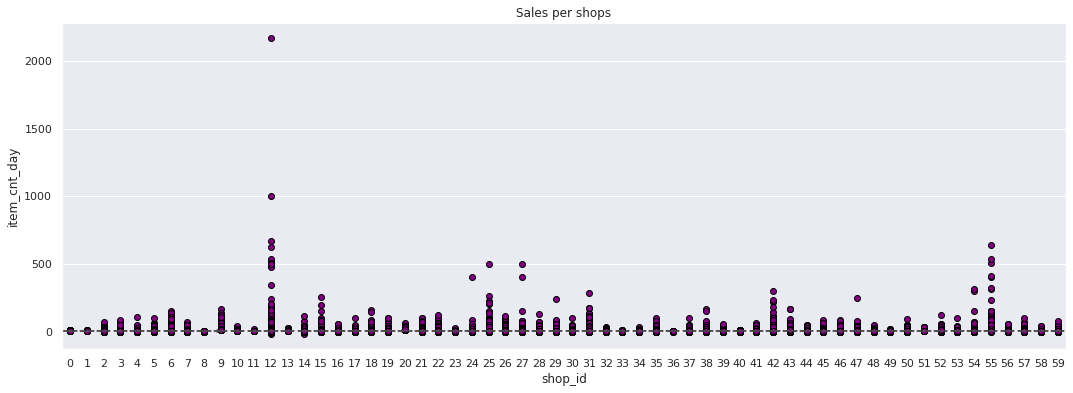

In [ ]:
sns.set_theme(style="whitegrid")
flierprops = dict(marker='o', markerfacecolor='purple', markersize=6,
                  linestyle='none', markeredgecolor='black')
plt.figure(figsize=(18,6))
sns.set_theme(color_codes=True)
ax = sns.boxplot(data=sales_train, y="item_cnt_day", x = 'shop_id',color='yellow',flierprops=flierprops)
plt.title('Sales per shops')
plt.show()


A partir de lo observado en la gráfica anterior, se procede a eliminar los elementos *outlayers* del dataset. 

In [ ]:
sales_train = sales_train[sales_train.item_cnt_day<1000]
sales_train = sales_train[~((sales_train.item_cnt_day>400) & (sales_train.shop_id==24))]
sales_train = sales_train[~((sales_train.item_cnt_day>200) & (sales_train.shop_id==47))]

In [ ]:
len(sales_train)

2935845

Volvemos a graficar los datos después del proceso de limpieza

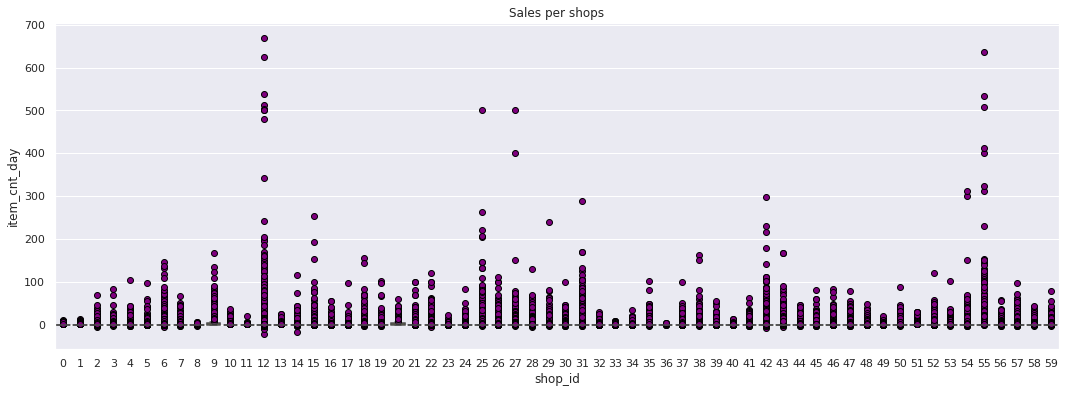

In [ ]:
flierprops = dict(marker='o', markerfacecolor='purple', markersize=6,
                  linestyle='none', markeredgecolor='black')
plt.figure(figsize=(18,6))
sns.set_theme(color_codes=True)
ax = sns.boxplot(data=sales_train, y="item_cnt_day", x = 'shop_id',color='yellow',flierprops=flierprops)
plt.title('Sales per shops')
plt.show()

Se repite el procedimiento anterior para validar los precios de los productos:

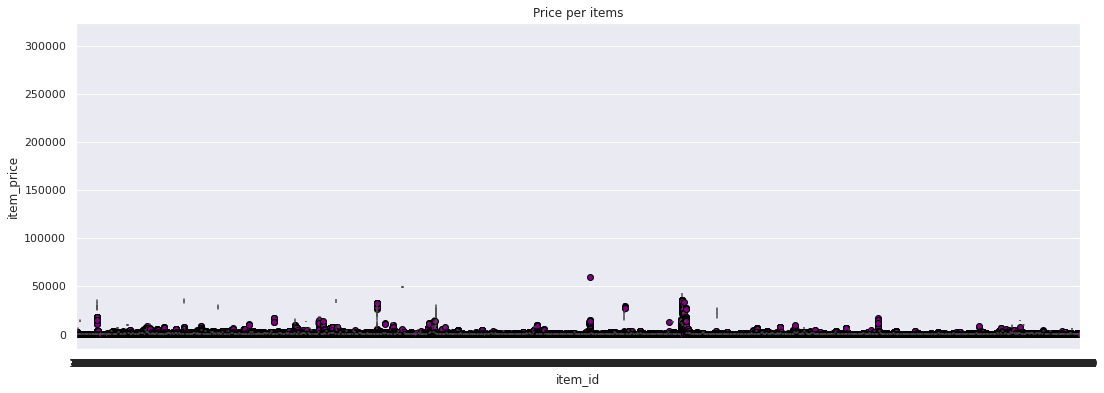

In [ ]:
flierprops = dict(marker='o', markerfacecolor='purple', markersize=6,
                  linestyle='none', markeredgecolor='black')
plt.figure(figsize=(18,6))
sns.set_theme(color_codes=True)
ax = sns.boxplot(data=sales_train, y="item_price", x = 'item_id',color='yellow',flierprops=flierprops)
plt.title('Price per items')
plt.show()

Se observa que hay algunos valores muy altos comparados con los demás del dataset. Se eliminan estoy valores.

In [ ]:
sales_train = sales_train[sales_train.item_price<50000]

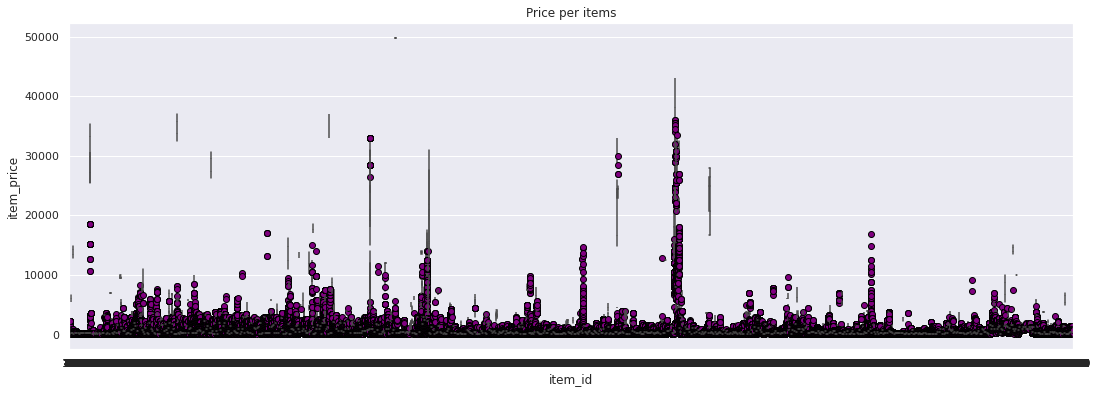

In [ ]:
flierprops = dict(marker='o', markerfacecolor='purple', markersize=6,
                  linestyle='none', markeredgecolor='black')
plt.figure(figsize=(18,6))
sns.set_theme(color_codes=True)
ax = sns.boxplot(data=sales_train, y="item_price", x = 'item_id',color='yellow',flierprops=flierprops)
plt.title('Price per items')
plt.show()

In [ ]:
sales_train.to_csv('New_Datasets/sales_train.csv',index=False)

##**6.test.csv**

In [ ]:
test = pd.read_csv('MonografiaGithub/Datasets/test.csv')
test.head(10)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
5,5,5,5039
6,6,5,5041
7,7,5,5046
8,8,5,5319
9,9,5,5003


In [ ]:
test.isnull().values.sum()

0

In [ ]:
test.to_csv('New_Datasets/test.csv',index=False)